# Import Libraries

### Pandas 
### Seaborn
### Matplotlib
### Numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\BayesianRidge/Sales_Revenue.csv")

### Check the data 

In [3]:
df.head()

,ad_spend_tv,ad_spend_radio,ad_spend_social,website_visits,email_campaigns_sent,season_autumn,season_spring,season_summer,season_winter,sales_revenue
0,28631.811389,25129.117627,45811.455035,5862,0,0,0,0,1,11878.222663
1,20491.344403,2406.537780,30887.453118,49201,2,1,0,0,0,96043.284800
2,79446.109286,12728.740692,33872.090029,32315,9,0,0,0,1,78943.508715
3,81809.721940,21705.205217,35751.664696,22338,0,1,0,0,0,50293.382828
4,64434.700643,3029.994484,44195.509043,31022,9,0,0,0,1,77880.091301


### Check Null Values 

In [4]:
df.isnull().sum()

ad_spend_tv             0
ad_spend_radio          0
ad_spend_social         0
website_visits          0
email_campaigns_sent    0
season_autumn           0
season_spring           0
season_summer           0
season_winter           0
sales_revenue           0
dtype: int64

### Check the Total Number of Rows and Columns 

In [5]:
df.shape

(1000, 10)

### Check Complete Information About the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ad_spend_tv           1000 non-null   float64
 1   ad_spend_radio        1000 non-null   float64
 2   ad_spend_social       1000 non-null   float64
 3   website_visits        1000 non-null   int64  
 4   email_campaigns_sent  1000 non-null   int64  
 5   season_autumn         1000 non-null   int64  
 6   season_spring         1000 non-null   int64  
 7   season_summer         1000 non-null   int64  
 8   season_winter         1000 non-null   int64  
 9   sales_revenue         1000 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 78.2 KB


### Check the Stastistics Summary

In [7]:
df.describe()

,ad_spend_tv,ad_spend_radio,ad_spend_social,website_visits,email_campaigns_sent,season_autumn,season_spring,season_summer,season_winter,sales_revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51798.484812,15998.984623,25708.024716,27901.517000,4.535000,0.262000,0.252000,0.240000,0.246000,63946.456696
std,27728.812623,8544.893070,13667.952118,13256.434974,2.841628,0.439943,0.434379,0.427297,0.430894,24686.078345
min,5116.817805,1018.836529,2002.381901,5002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11535.331022
25%,27607.106316,8098.038291,13628.771719,16054.000000,2.000000,0.000000,0.000000,0.000000,0.000000,42744.986773
50%,51523.582851,16553.181966,26195.537197,28542.000000,5.000000,0.000000,0.000000,0.000000,0.000000,64090.531653
75%,75321.661025,23409.669995,37351.314981,39801.500000,7.000000,1.000000,1.000000,0.000000,0.000000,85628.650429
max,99952.876477,29913.917930,49996.618879,49969.000000,9.000000,1.000000,1.000000,1.000000,1.000000,120817.036777


### Check the Relationship between the columns 

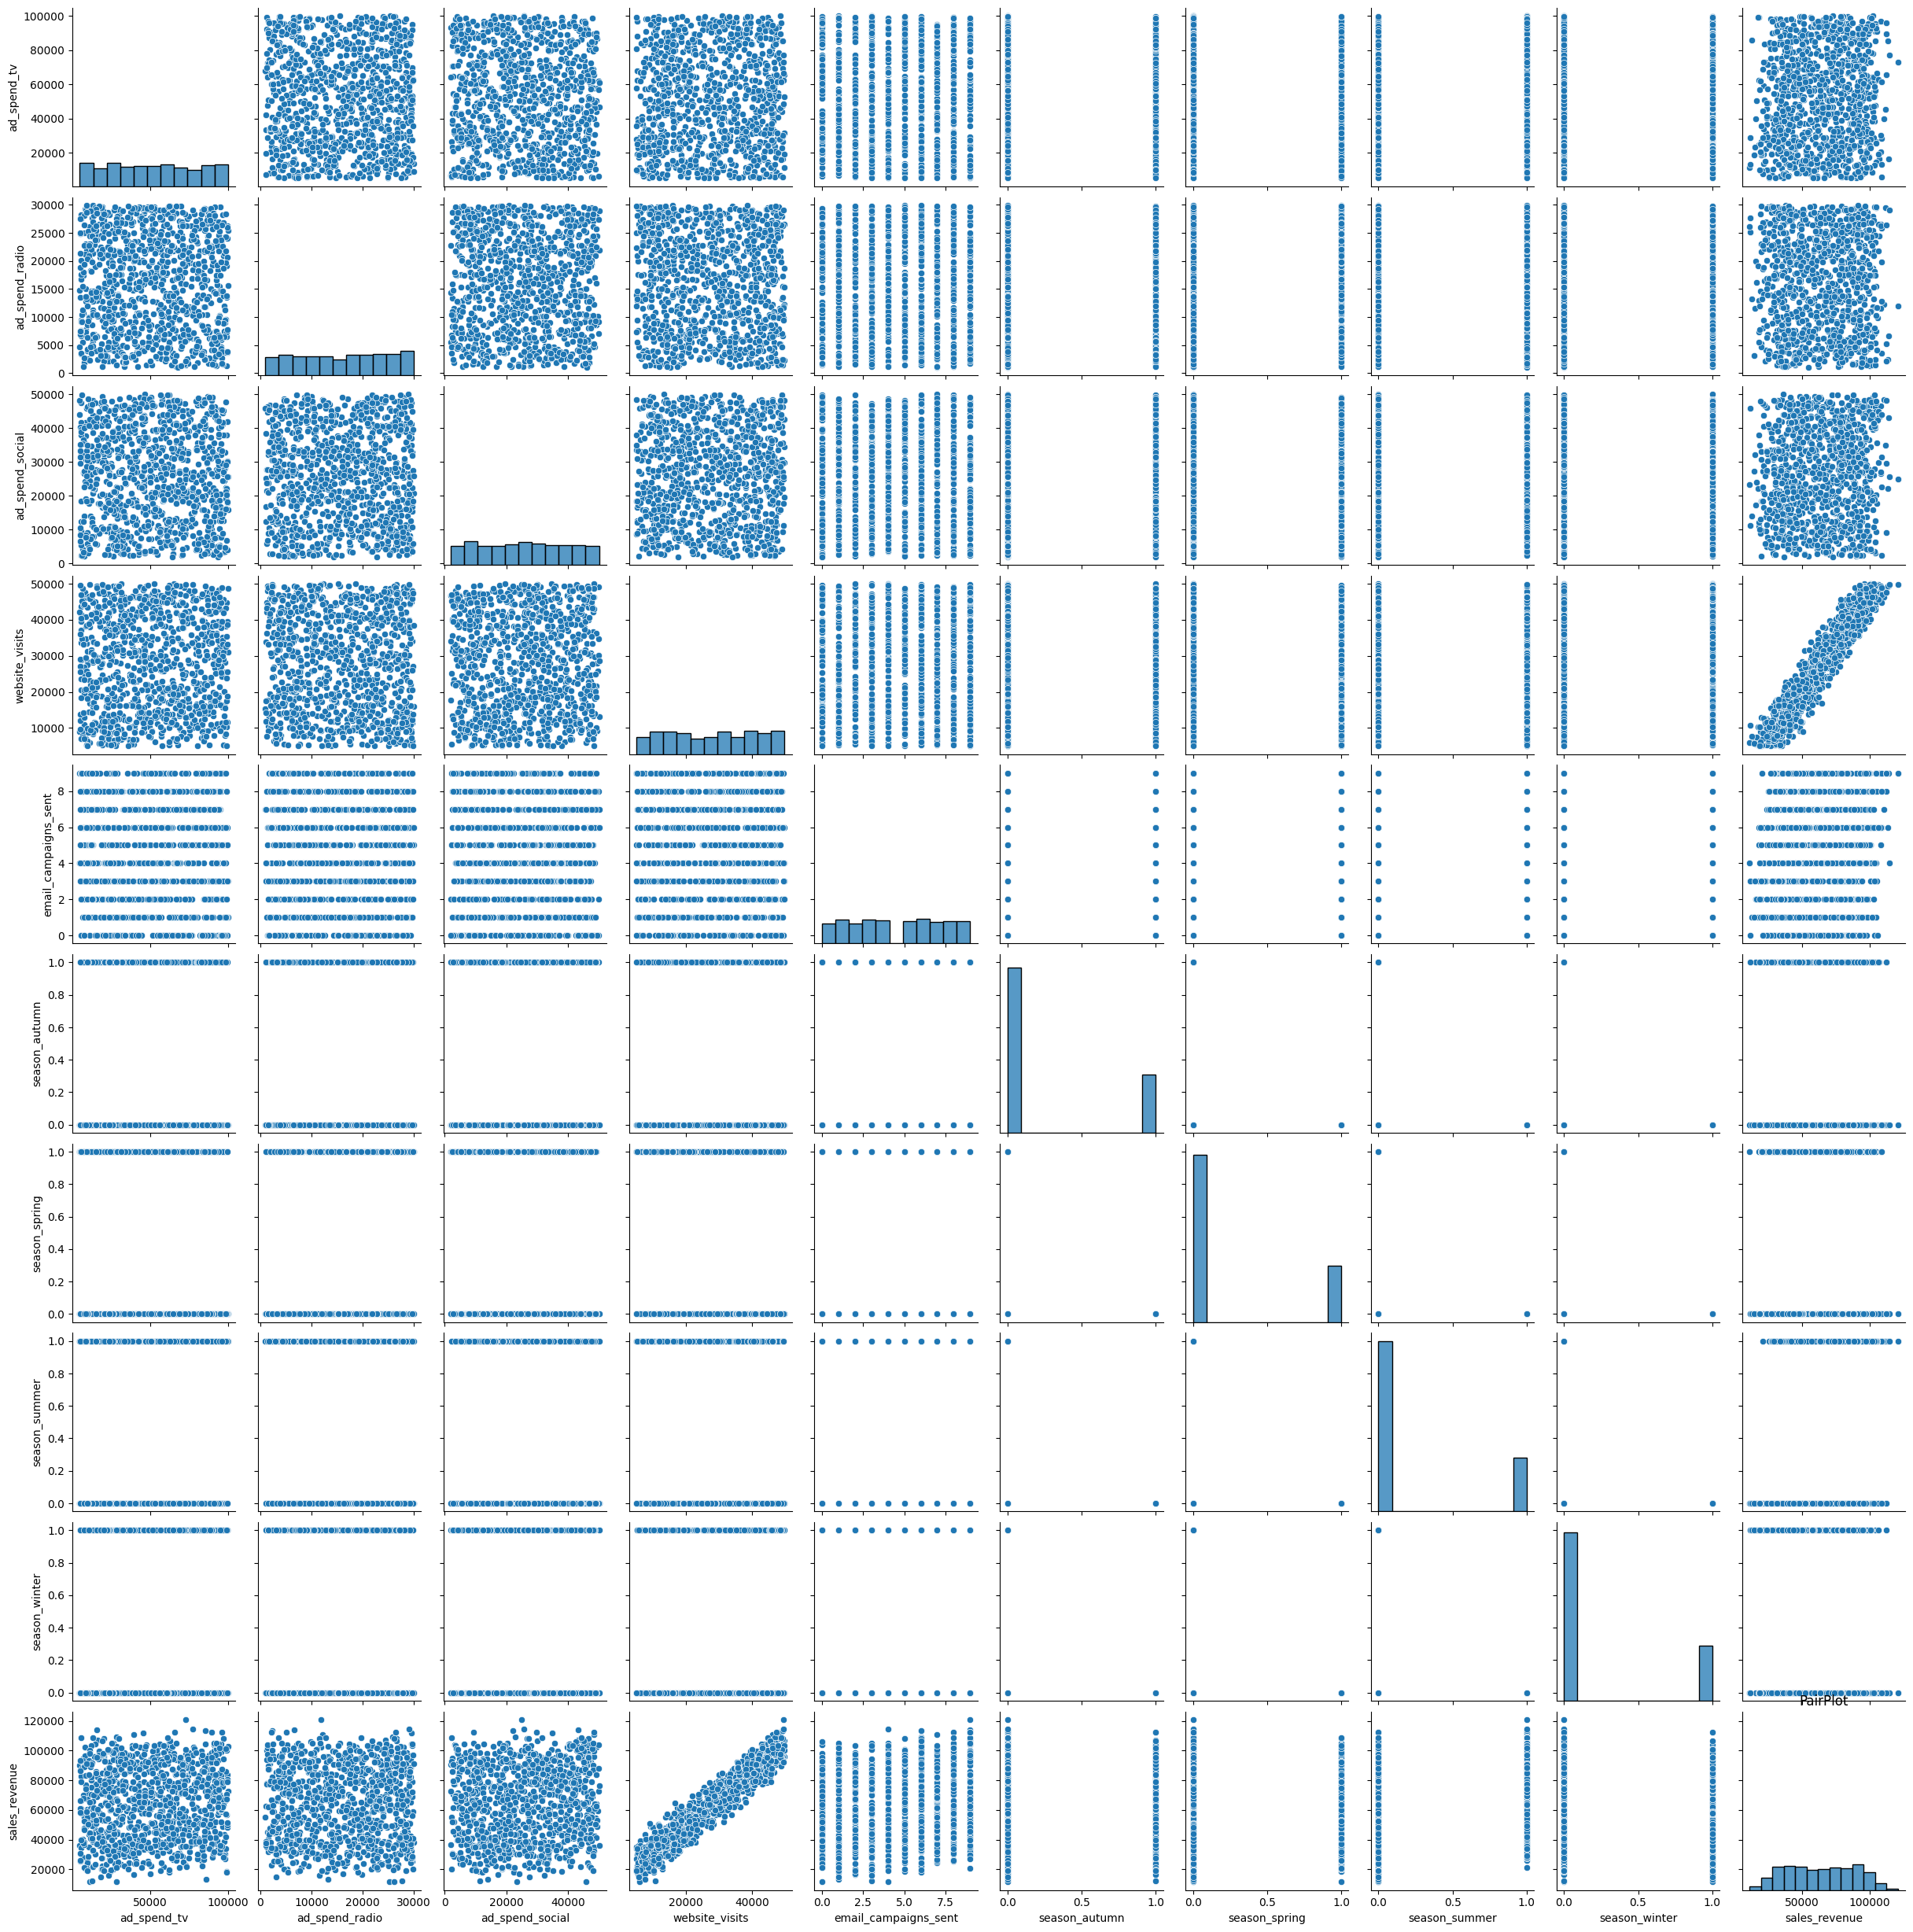

In [8]:
sns.pairplot(data=df)
plt.title("PairPlot")
plt.show()

### Check Co-Relation between the columns 

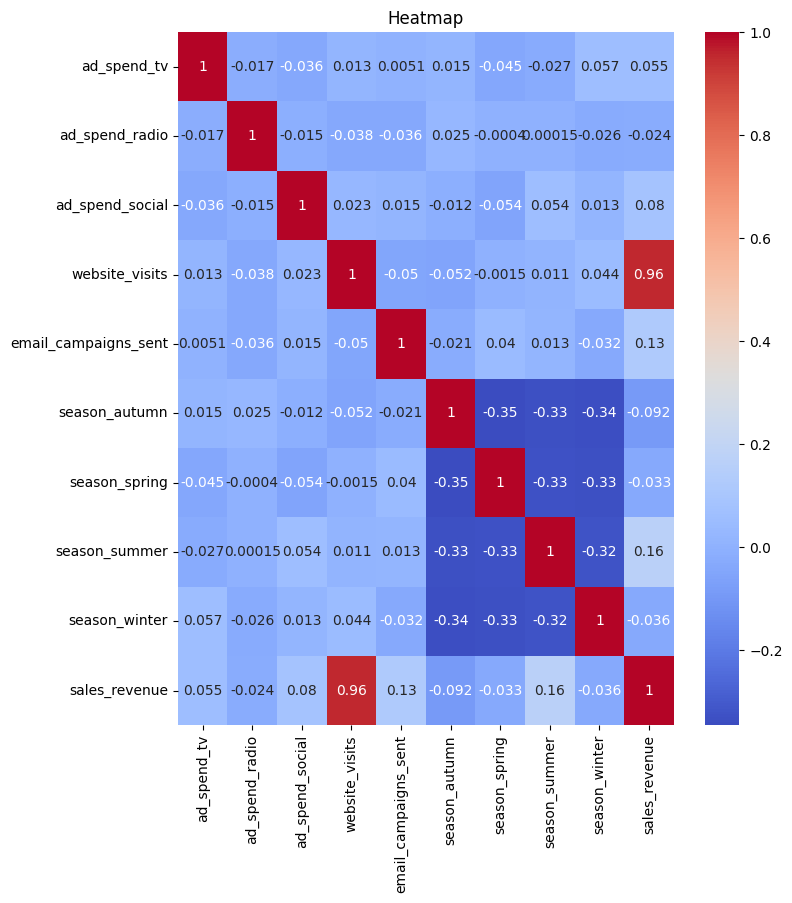

In [9]:
plt.figure(figsize=(8,9))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Heatmap")
plt.show()

### Split the data in x and y ( Dependent or Independent Variable)

In [10]:
x = df.iloc[:,:-1]
y=df[["sales_revenue"]]

### Import Train_Test_Split from sklearn for spliting the data in training and testing 

In [11]:
from sklearn.model_selection import train_test_split

### Split the data in Training or Testing 

In [20]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=16) #14 

### Import Machine Learning Model BayesianRidge From Linear Model 

In [21]:
from sklearn.linear_model import BayesianRidge

### Apply / Fit The Model 

In [22]:
br = BayesianRidge()
br.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,max_iter,300
,tol,0.001
,alpha_1,1e-06
,alpha_2,1e-06
,lambda_1,1e-06
,lambda_2,1e-06
,alpha_init,None
,lambda_init,None
,compute_score,False
,fit_intercept,True
,copy_X,True


### Check the score (accuracy) for check the scanerio of Overfitting (Over model is not Overfit)

In [23]:
br.score(x_test,y_test)*100,br.score(x_train,y_train)*100

(91.72355625097236, 92.65822805025255)

### Predict the Value

In [24]:
df ["Prediction"] =br.predict(x)
df.head()

,ad_spend_tv,ad_spend_radio,ad_spend_social,website_visits,email_campaigns_sent,season_autumn,season_spring,season_summer,season_winter,sales_revenue,Prediction
0,28631.811389,25129.117627,45811.455035,5862,0,0,0,0,1,11878.222663,26397.677860
1,20491.344403,2406.537780,30887.453118,49201,2,1,0,0,0,96043.284800,98055.525703
2,79446.109286,12728.740692,33872.090029,32315,9,0,0,0,1,78943.508715,73125.070199
3,81809.721940,21705.205217,35751.664696,22338,0,1,0,0,0,50293.382828,56686.633453
4,64434.700643,3029.994484,44195.509043,31022,9,0,0,0,1,77880.091301,70529.729010


### Import Metrics from Sklearn to check overall performance of our Model 

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Check the Metrics 

In [26]:
y_pred = br.predict(x_test)

mbr = mean_absolute_error(y_pred,y_test)
mse = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(f"MBR : {mbr*100:.2f}")
print(f"MSE : {mse*100:.2f}")
print(f"r2 : {r2*100:.2f}")


MBR : 567535.29
MSE : 567535.29
r2 : 90.20


#### Check the Model Performance Through Visualization 

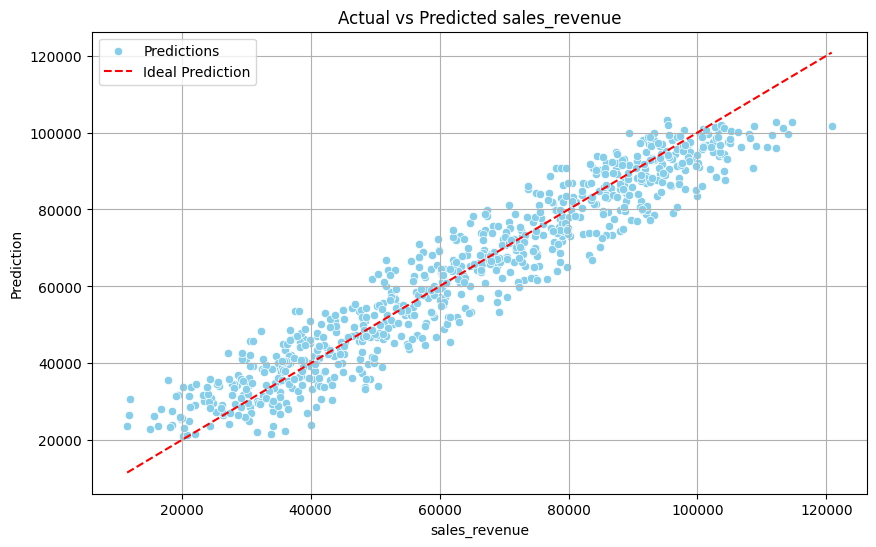

In [28]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("sales_revenue")
plt.ylabel("Prediction")
plt.title("Actual vs Predicted sales_revenue")
plt.legend()
plt.grid(True)
plt.show()
